# Diabetes Risk Assessment


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing pandas to open dataset

In [2]:
data = pd.read_csv("Healthcare-Diabetes.csv")
data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


### Open and printing dataset

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


###  The line above generates summary statistics for each column in the 'data'  and then transposes the results for better readability and comparison.

### The following line provides a concise summary of the 'data'
.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


# Assumtions
Assuming that Linear Regression is the least accurate model and that either the RandomForest Classifier or BaggingClassifier models are the most accurate ones, we also assume that the 'glucose' feature has the most significant influence on the 'outcome' variable.

<Axes: xlabel='Outcome'>

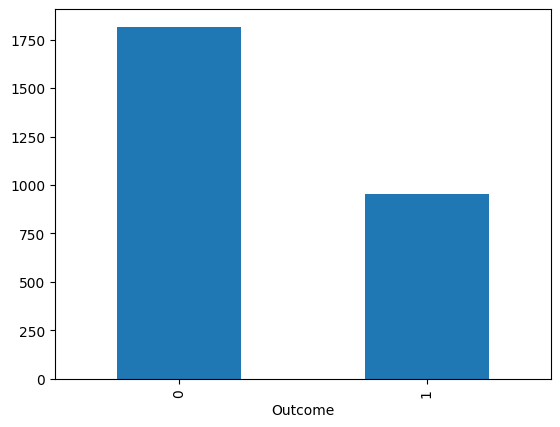

In [5]:
data["Outcome"].value_counts().plot(kind="bar")

### Here we are visualizing the distribution of the 'Outcome' column..

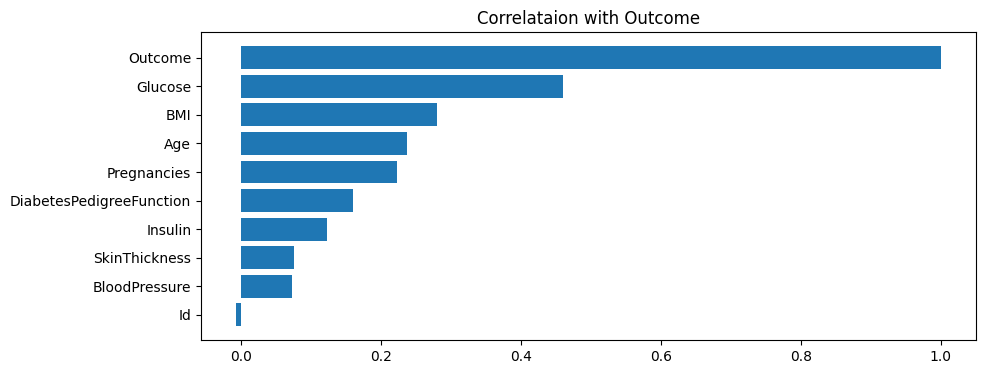

In [6]:
fig = plt.figure(figsize = (10, 4))
outcome_corr = pd.DataFrame(data.corr()['Outcome'].sort_values(ascending = True))
plt.barh(outcome_corr.index, outcome_corr['Outcome'])
plt.title('Correlataion with Outcome')
plt.show()

### Calculate the correlation between each feature and the 'Outcome' column

## Preparing dataset for training 

In [7]:
data.drop(["Id"], axis=1, inplace=True)
# data.drop(["BloodPressure"], axis=1, inplace=True)
# data.drop(["SkinThickness"], axis=1, inplace=True)
# data.drop(["Insulin"], axis=1, inplace=True)
# data.drop(["DiabetesPedigreeFunction"], axis=1, inplace=True)
# data.drop(["Glucose"], axis=1, inplace=True)
# data.drop(["BMI"], axis=1, inplace=True)
# data.drop(["Pregnancies"], axis=1, inplace=True)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Spliting dataset

In [10]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling 

In [12]:
Sc=StandardScaler()

In [13]:
X_train_Scaled=Sc.fit_transform(X_train)

In [14]:
X_test_Scaled=Sc.fit_transform(X_test)

## Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

The accuracy of the Model Train is 78.41
The accuracy of the Model Train is 77.44
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.52      0.61       187

    accuracy                           0.77       554
   macro avg       0.76      0.71      0.73       554
weighted avg       0.77      0.77      0.76       554



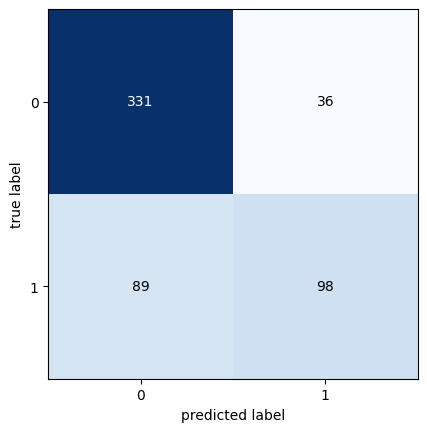

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold , cross_val_score
y_pred = lg.predict(X_test)
log_acc = (lg.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {log_acc:.2f}')
log_acc =(lg.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {log_acc:.2f}')
con=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))
tp, fp, fn, tn = con.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_log = 2 * (precision * recall) / (precision + recall)


## KNeighborsClassifier Model

In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

The accuracy of the Model Train is 95.35
The accuracy of the Model Train is 86.46
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.52      0.61       187

    accuracy                           0.77       554
   macro avg       0.76      0.71      0.73       554
weighted avg       0.77      0.77      0.76       554



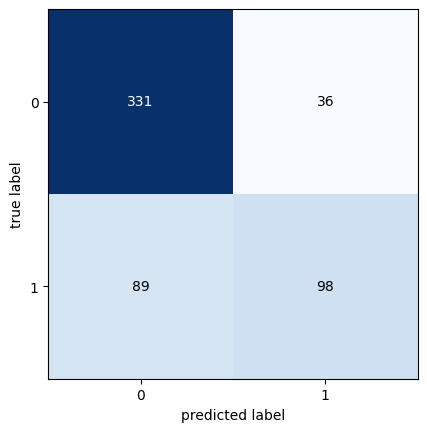

In [19]:
knc_acc = (knn.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {knc_acc:.2f}')
knc_acc =(knn.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {knc_acc:.2f}')
con=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))
tp, fp, fn, tn = con.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_knc = 2 * (precision * recall) / (precision + recall)

## Decision TreeClassifier Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
data = DecisionTreeClassifier(max_depth = 5 , max_features= 4)
data.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5, max_features=4)

The accuracy of the Model Train is 82.52
The accuracy of the Model Train is 79.24
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.52      0.61       187

    accuracy                           0.77       554
   macro avg       0.76      0.71      0.73       554
weighted avg       0.77      0.77      0.76       554



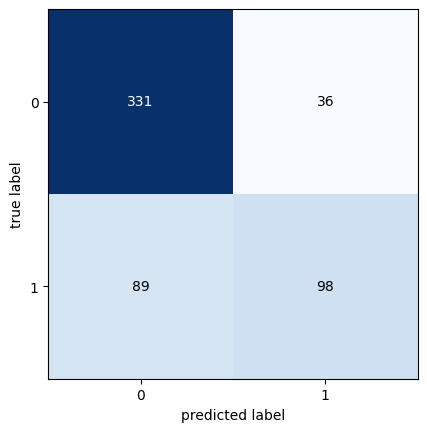

In [21]:
dtc_acc = (data.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {dtc_acc:.2f}')
dtc_acc =(data.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {dtc_acc:.2f}')
con=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))
tp, fp, fn, tn = con.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_dtc = 2 * (precision * recall) / (precision + recall)

<Axes: >

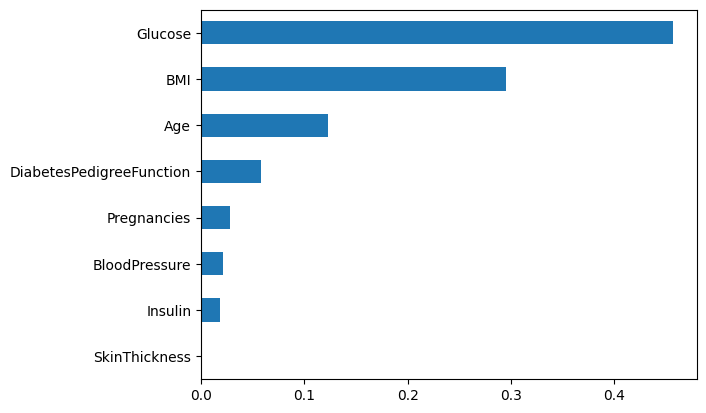

In [22]:
(pd.Series(data.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh')) 

## RandomForest Classifier Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 6 , max_depth=8 ,max_features= 7)
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=8, max_features=7, n_estimators=6)

The accuracy of the Model Train is 95.66
The accuracy of the Model Train is 92.42
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.52      0.61       187

    accuracy                           0.77       554
   macro avg       0.76      0.71      0.73       554
weighted avg       0.77      0.77      0.76       554



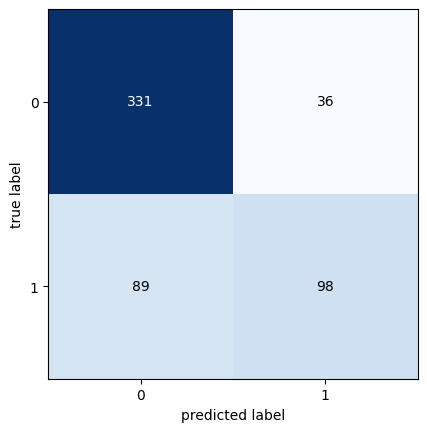

In [24]:
rfc_acc = (rf.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {rfc_acc:.2f}')
rfc_acc =(rf.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {rfc_acc:.2f}')
con=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))
tp, fp, fn, tn = con.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_rfc = 2 * (precision * recall) / (precision + recall)

## BaggingClassifier Model

In [25]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=150, random_state=2)
bc.fit(X_train,y_train)
BaggingClassifier(n_estimators=150, random_state=2)

BaggingClassifier(n_estimators=150, random_state=2)

In [26]:
y_pred=bc.predict(X_test)

The accuracy of the Model Train is 100.00
The accuracy of the Model Train is 98.19
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



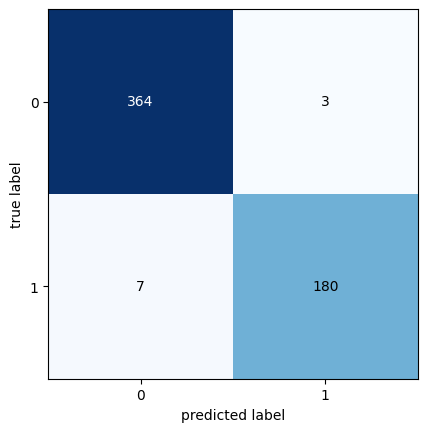

In [27]:
bg_acc = (bc.score(X_train , y_train)*100)
print(f'The accuracy of the Model Train is {bg_acc:.2f}')
bg_acc =(bc.score(X_test , y_test)*100)
print(f'The accuracy of the Model Train is {bg_acc:.2f}')
con=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))
tp, fp, fn, tn = con.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_bg = 2 * (precision * recall) / (precision + recall)

## Conclusions

In [28]:
print(('{0:41}{1:31}{2:30}').format("Scores for all models:","precision","f1-score"))
print('{0:30}{1:20}{2:30}'.format("Logistic Regression Model:",log_acc,f1_log))
print('{0:30}{1:20}{2:30}'.format("KNeighborsClassifier Model:",knc_acc,f1_knc))
print('{0:30}{1:20}{2:30}'.format("Decision TreeClassifier Model:",dtc_acc,f1_dtc))
print('{0:30}{1:20}{2:30}'.format("RandomForest Classifier Model:",rfc_acc,f1_rfc))
print('{0:30}{1:20}{2:30}'.format("BaggingClassifier Model:",bg_acc,f1_bg))

Scores for all models:                   precision                      f1-score                      
Logistic Regression Model:       77.43682310469315             0.841168996188056
KNeighborsClassifier Model:      86.46209386281588             0.841168996188056
Decision TreeClassifier Model:    79.2418772563177             0.841168996188056
RandomForest Classifier Model:    92.4187725631769             0.841168996188056
BaggingClassifier Model:         98.19494584837545            0.9864498644986449


Based on our assumptions, which have been validated, it is evident that Linear Regression, as expected, yielded the least accurate results. Conversely, both the RandomForest Classifier and BaggingClassifier models demonstrated superior accuracy. Additionally, it is clear that the 'glucose' feature emerged as the most influential factor in predicting the 'outcome' variable. These findings underscore the importance of utilizing ensemble methods like RandomForest and BaggingClassifier when dealing with complex datasets, and emphasize the significance of the 'glucose' feature in the context of our analysis